In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the customer data
customer_data = pd.read_csv('ecom_data_rfm.csv')
print (customer_data)

      Unnamed: 0  CustomerID  Frequency  Recency  Monetary  rankR  rankF  \
0              1       12346          2      358      2.08      2      1   
1              2       12347        182       35    481.21      5      4   
2              3       12348         31      108    178.71      5      1   
3              4       12349         73       51    605.10      5      2   
4              5       12350         17      343     65.30      2      1   
...          ...         ...        ...      ...       ...    ...    ...   
4375        4376       18280         10      310     47.65      2      1   
4376        4377       18281          7      213     39.36      3      1   
4377        4378       18282         13       40     62.68      5      1   
4378        4379       18283        756       36   1220.93      5      5   
4379        4380       18287         70       75    104.55      5      2   

      rankM  groupRFM         Country  
0         1       211  United Kingdom  
1      

In [9]:
# Exclude non-numeric columns
numeric_data = customer_data.drop('Country', axis=1)
print (numeric_data)

      Unnamed: 0  CustomerID  Frequency  Recency  Monetary  rankR  rankF  \
0              1       12346          2      358      2.08      2      1   
1              2       12347        182       35    481.21      5      4   
2              3       12348         31      108    178.71      5      1   
3              4       12349         73       51    605.10      5      2   
4              5       12350         17      343     65.30      2      1   
...          ...         ...        ...      ...       ...    ...    ...   
4375        4376       18280         10      310     47.65      2      1   
4376        4377       18281          7      213     39.36      3      1   
4377        4378       18282         13       40     62.68      5      1   
4378        4379       18283        756       36   1220.93      5      5   
4379        4380       18287         70       75    104.55      5      2   

      rankM  groupRFM  
0         1       211  
1         3       543  
2         2    

In [10]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
print (scaled_data)

[[-1.73165541 -1.70922721 -0.39221824 ... -0.65674015 -0.67593529
  -1.99655229]
 [-1.73086452 -1.7086475   0.38279112 ...  1.70493626  0.852509
   0.79210148]
 [-1.73007363 -1.70806779 -0.26735562 ... -0.65674015  0.08828685
   0.53171513]
 ...
 [ 1.73007363  1.73192693 -0.34485656 ... -0.65674015 -0.67593529
   0.52331557]
 [ 1.73086452  1.73250664  2.85420989 ...  2.49216174  2.38095328
   0.89289619]
 [ 1.73165541  1.73482547 -0.09943693 ...  0.13048532 -0.67593529
   0.60731117]]


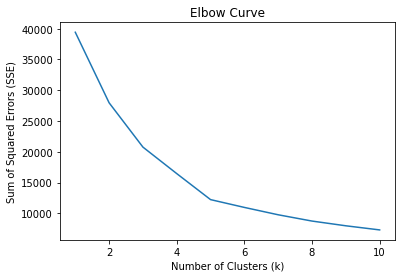

In [11]:
# Determine the optimal number of clusters (k) using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

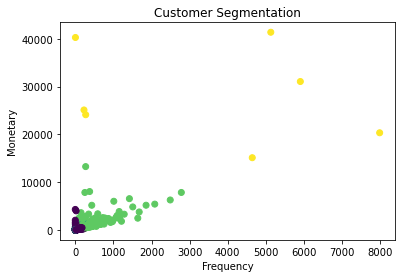

In [19]:
# Based on the elbow curve,
k = 5

# Build the K-means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Assign clusters to the data points
customer_data['Cluster'] = kmeans.labels_

#frequency and monetary
plt.scatter(customer_data['Frequency'], customer_data['Monetary'], 
            c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation')
plt.show()

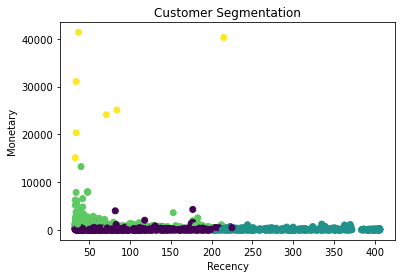

In [20]:
#recency and monetary
plt.scatter(customer_data['Recency'], customer_data['Monetary'],
            c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation')
plt.show()

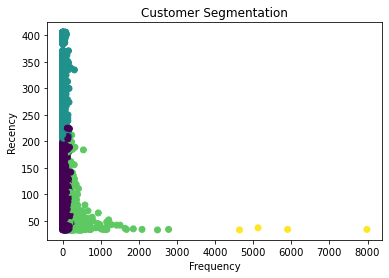

In [21]:
#frequency and recency
plt.scatter(customer_data['Frequency'], customer_data['Recency'], 
            c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Customer Segmentation')
plt.show()

In [33]:
# Analyze the characteristics of each cluster
cluster_profiles = customer_data.groupby('Cluster').mean()

# Print the profile of each cluster
for cluster in range(k):
    print(f"Cluster {cluster + 1} Profile:")
    print(cluster_profiles.loc[cluster])
    print('\n')

Cluster 1 Profile:
Unnamed: 0     3315.389374
CustomerID    16827.070597
Frequency        53.114993
Recency          83.290393
Monetary        162.646333
rankR             4.796215
rankF             1.482533
rankM             1.490539
groupRFM        495.937409
Name: 0, dtype: float64


Cluster 2 Profile:
Unnamed: 0     1080.330920
CustomerID    13781.734251
Frequency        51.012310
Recency          83.708907
Monetary        155.994476
rankR             4.790007
rankF             1.433020
rankM             1.479363
groupRFM        494.810282
Name: 1, dtype: float64


Cluster 3 Profile:
Unnamed: 0     2233.239617
CustomerID    15352.736954
Frequency        25.608094
Recency         295.091587
Monetary         93.925837
rankR             2.308839
rankF             1.121406
rankM             1.189563
groupRFM        243.287540
Name: 2, dtype: float64


Cluster 4 Profile:
Unnamed: 0     2116.920471
CustomerID    15194.269514
Frequency       318.287187
Recency          55.490427
Monetary 

In [31]:
new_data = pd.DataFrame({
    '': [0,0,0],
    'Frequency': [10, 5, 8],
    'Recency': [20, 30, 15],
    'Monetary': [100, 50, 80],
    'rankR': [2, 3, 1],
    'rankF': [1, 2, 3],
    'rankM': [3, 2, 1],
    'groupRFM': ['100', '200', '300'],
    'country': ['0', '1', '0']
})


# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Predict the cluster labels for the new data
predicted_clusters = kmeans.predict(scaled_new_data)

# Print the predicted clusters for the new data
print("Predicted Clusters:")
print(predicted_clusters)

Predicted Clusters:
[3 3 3]


In [34]:
# Analyze the characteristics of each cluster
cluster_profiles = customer_data.groupby('Cluster').mean()

# Print the profile of each cluster
for cluster in range(k):
    print(f"Cluster {cluster + 1} Profile:")
    print(cluster_profiles.loc[cluster])
    print('\n')

# Find the number of customers in each cluster group
customer_counts = customer_data['Cluster'].value_counts()

# Print the number of customers in each cluster
for cluster, count in customer_counts.items():
    print(f"Cluster {cluster}: {count} customers")


Cluster 1 Profile:
Unnamed: 0     3315.389374
CustomerID    16827.070597
Frequency        53.114993
Recency          83.290393
Monetary        162.646333
rankR             4.796215
rankF             1.482533
rankM             1.490539
groupRFM        495.937409
Name: 0, dtype: float64


Cluster 2 Profile:
Unnamed: 0     1080.330920
CustomerID    13781.734251
Frequency        51.012310
Recency          83.708907
Monetary        155.994476
rankR             4.790007
rankF             1.433020
rankM             1.479363
groupRFM        494.810282
Name: 1, dtype: float64


Cluster 3 Profile:
Unnamed: 0     2233.239617
CustomerID    15352.736954
Frequency        25.608094
Recency         295.091587
Monetary         93.925837
rankR             2.308839
rankF             1.121406
rankM             1.189563
groupRFM        243.287540
Name: 2, dtype: float64


Cluster 4 Profile:
Unnamed: 0     2116.920471
CustomerID    15194.269514
Frequency       318.287187
Recency          55.490427
Monetary 